# Programming Assignment 2: Data preparation and unsupervised learning


## Objectives
* Apply data preparation techniques
* Implement unsupervised learning algorithms
* Understand visualization and insights gained from unsupervised learning methods



## Hand-in instructions
You are expected to hand-in a Jupyter notebook based on this one. Your notebook should contain running code and answer all questions posed in this assignment.

You can structure your code as you wish, as long as it is well structured and commented. You can structure it in different files or in a single one. The code provided in this assignment is a suggestion, feel free to solve the exercises as you wish.

Throughout the assignment, there are portions of code marked with ??. You have to complete that code with your own.

## 1. Data preparation

Download the Mall Customers dataset. Load the dataset ( [Mall_Customers.csv](https://www.kaggle.com/datasets/kandij/mall-customers?resource=download)) using pandas. Pandas is majorly focused on data processing, manipulation, cleaning, and visualization.

When you load a dataset with pandas, it is loaded as a dataframe. Look up the documentation.


In [28]:
import pandas as pd

#Load dataset
mall = pd.read_csv('Mall_Customers.csv')


**What is a dataframe? Can you turn any dataset into a dataframe?**

As the chatGPT says, a DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). Think of it as a table (like in Excel) where rows represent individual records and columns represent variables or attributes.

Any dataset that follow the tabular format (rows and columns) can be convert into a dataframe.

__Display the first few rows, check data types, and get a summary of statistics (mean, median, mode).__  **What do the statistics indicate about the data?**



Firstly, the definition of each statistic:

* Mean: The average value. This helps you understand the central tendency for the numerical features.
* Median: The middle value when the data is sorted. For cases where the mean may be biased by extreme values, it provides a more robust view of the central value.
* Mode: The value that appears most frequently. If certain values dominate a feature, it can be useful to identify it.

Some interpretations of the statistics below:

The mean and median of the Age column are close, cause mean = 38.85 and median = 36. It indicates that the data have a relatively symmetrical distribution.

The mode of Genre may indicate which sex is the most common among clients. In our case are Female.

For Annual Income and Expenditure Score, I'm not at all clear how to interpret them. We assume the same case as with age, having very similar values between the median and the mean, indicates that there will potentially be no outliers.

In [29]:
# Display the first few rows of the DataFrame
print("* First few rows of the dataset:\n")

print(mall.head())

# Check the data types of each column
print("\n* Data types of each column:\n")
print(mall.dtypes)

print("\n-------- Summary statistics --------")


# Mean of the columns
print("\n* Mean of each column:\n")
print(mall.mean(numeric_only=True))

# Median of the columns
print("\n* Median of each column:\n")
print(mall.median(numeric_only=True))

# Mode of the columns (mode returns a DataFrame, hence we take the first mode value using .iloc[0])
print("\n* Mode of each column:\n")
print(mall.mode().iloc[0])

* First few rows of the dataset:

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

* Data types of each column:

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

-------- Summary statistics --------

* Mean of each column:

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

* Median of each column:

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61

Missing Data: Check for missing values in the dataset using isnull(). If there are missing values, decide on an appropriate strategy (e.g., mean/median imputation or removing rows).

In [30]:
# Check for missing values in the entire DataFrame
print(mall.isnull().sum())

# If there are few cases, we will delete these data with the following code
mall_cleaned = mall.dropna()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Outliers: Plot histograms or boxplots for Age, Annual Income, and Spending Score. Identify and remove any outliers.



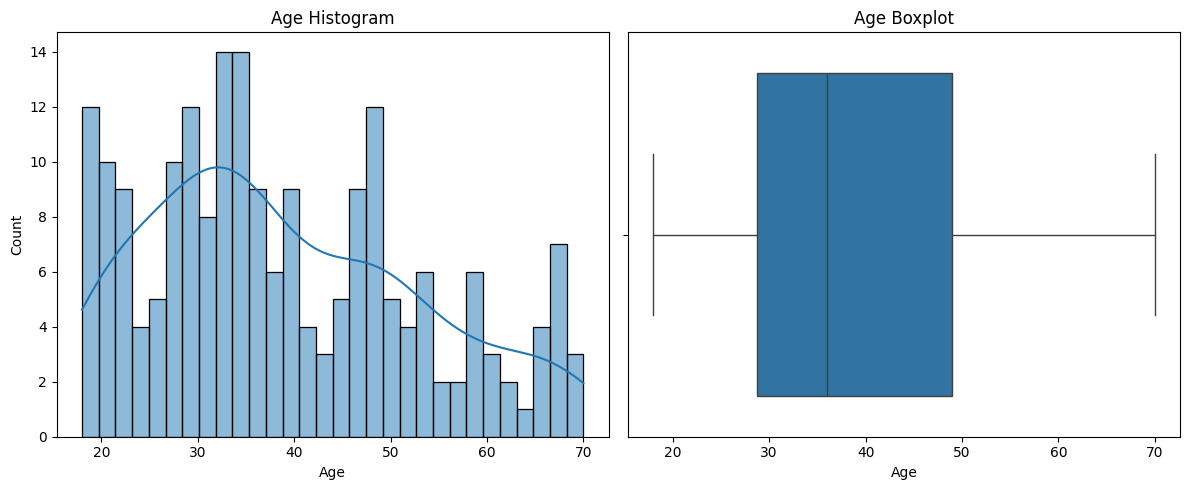

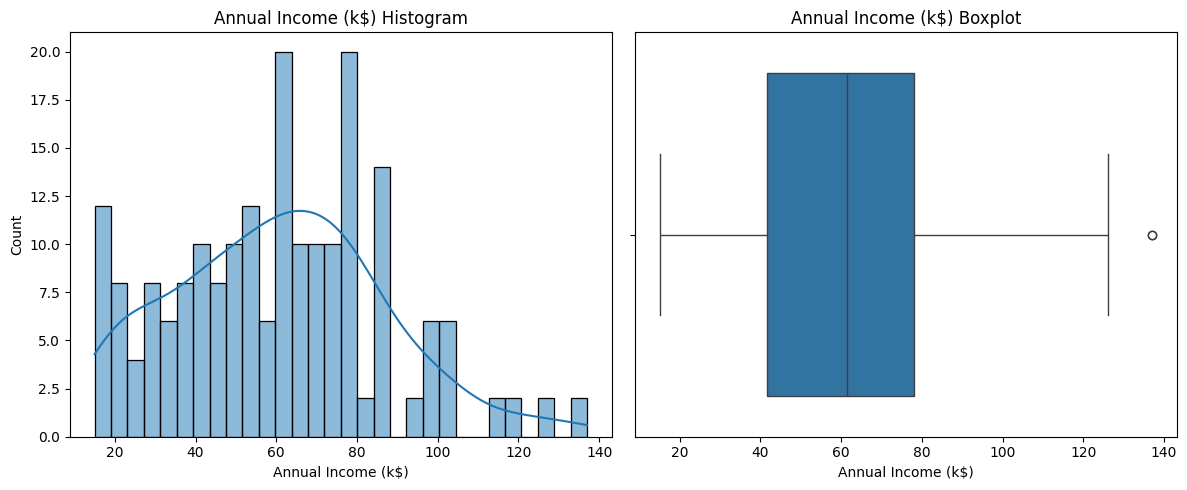

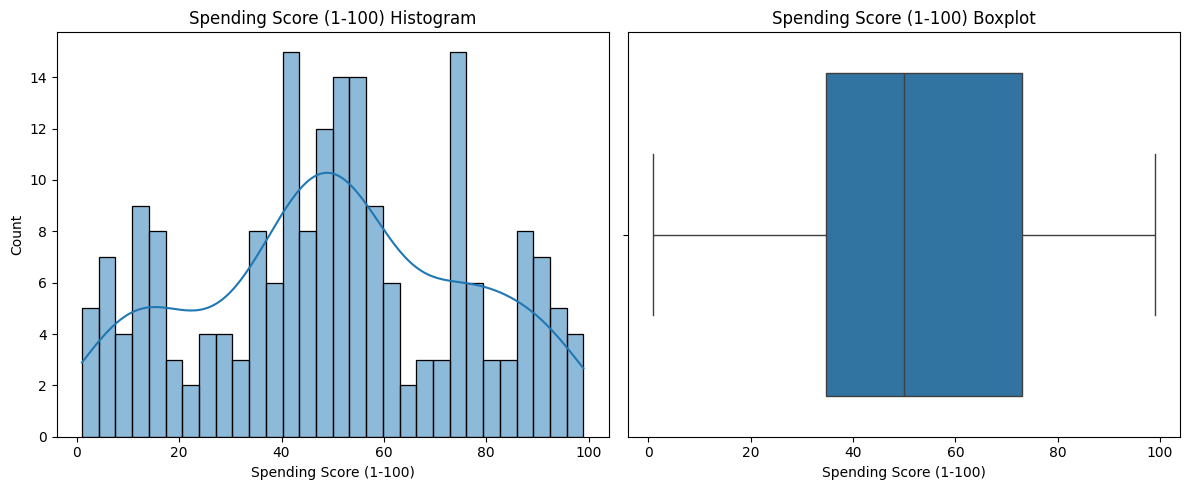

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define columns of interest
columns_of_interest = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Plot histograms and boxplots for each column
for col in columns_of_interest:
    plt.figure(figsize=(12, 5))

    # Plot histogram
    plt.subplot(1, 2, 1)
    sns.histplot(mall[col], bins=30, kde=True)
    plt.title(f'{col} Histogram')

    # Plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=mall[col])
    plt.title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()


Rescale the numerical columns (Age, Annual Income, Spending Score) using either Standardization (Z-score) or Min-Max Normalization to bring all features to a common scale. Use the sklearn.preprocessing library.
Save the new scaled dataset as a csv.


In [32]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Columns to scale
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Scale the specified columns
mall[columns_to_scale] = scaler.fit_transform(mall[columns_to_scale])

# Save the new scaled dataset to a CSV file
mall.to_csv('scaled_data_normalization.csv', index=False)

print("Min-Max normalized data saved as 'scaled_data_normalization.csv'")

# Initialize the StandardScaler
#scaler = StandardScaler()
# Scale the specified columns
#mall[columns_to_scale] = scaler.fit_transform(mall[columns_to_scale])
# Save the new scaled dataset to a CSV file
#mall.to_csv('scaled_data_standardization.csv', index=False)
#print("Standardized data saved as 'scaled_data_standardization.csv'")

Standardized data saved as 'scaled_data_standardization.csv'
Min-Max normalized data saved as 'scaled_data_normalization.csv'


# 2. Clustering

Apply the K-Means algorithm on the scaled dataset, only on the numerical columns.
Use the elbow method to determine the optimal number of clusters.
Plot the inertia (within-cluster sum of squares) to visualize the elbow.

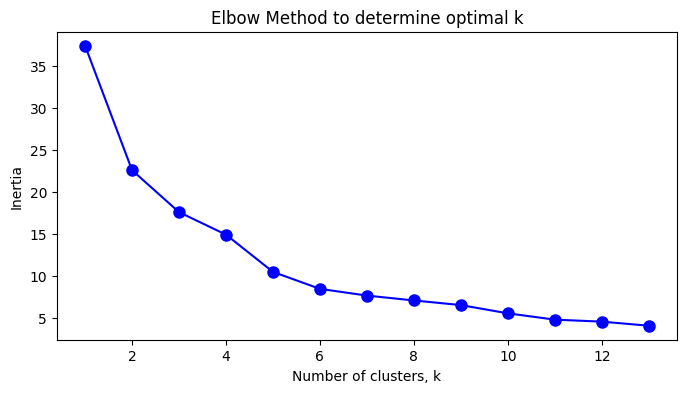

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
X = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Find the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 14)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method to determine optimal k')
plt.show()


Fit the K-Means model with the optimal number of clusters. Add the cluster labels to the original dataset.

In [45]:
# Fit the KMeans model with the optimal number of clusters (e.g., k=5)
kmeans = KMeans(n_clusters=6, random_state=42)
mall['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows with cluster labels
print(mall.head())


   CustomerID   Genre       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male  0.019231            0.000000                0.387755   
1           2    Male  0.057692            0.000000                0.816327   
2           3  Female  0.038462            0.008197                0.051020   
3           4  Female  0.096154            0.008197                0.775510   
4           5  Female  0.250000            0.016393                0.397959   

   Cluster  
0        2  
1        4  
2        2  
3        4  
4        2  


Plot the clusters using the Age, Annual Income, and Spending Score features.
Use matplotlib or seaborn to create scatter plots.

In [ ]:
import seaborn as sns

# Visualize the clusters
#2D using Income and Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mall['Annual Income (k$)'], y=mall['Spending Score (1-100)'],
                hue=mall['Cluster'], palette='Set1', s=100, legend='full')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#2D using Age and Income
??

#3D plot
import plotly.express as px
fig = px.scatter_3d(mall, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='Cluster')
fig.show()

 **How many clusters were optimal? Explain using the elbow plot.
Do you have an ide of what each cluster represents in terms of customer segmentation?
Describe the spending behavior of customers in each cluster (high income/high spending, low income/low spending, etc.).**

# Agglomerative clustering

Using sklearn.cluster, fit an agglomerative clustering model to the scaled data.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Fit Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
mall['ClusterAgg'] = agg_clustering.fit_predict(X)

Visualise the clustering in 3D. **Is it much different than the clustering obtained with k-means? Describe the demographics of each cluster.**

In [ ]:
#3D visualisation
??

# Evaluating clustering

Use silhouette scores as a way to evaluate the quality of the aggregated clustering. **What does the score mean?**

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, mall['ClusterAgg'])
print(f"Silhouette Score: {silhouette_avg}")

## 3. Association Rule Mining with Apriori Algorithm

In this exercise, we will use the Apriori algorithm to find frequent itemsets and generate association rules from a simple dataset. Association Rule Mining is commonly used in market basket analysis to find relationships between items purchased together.

This exercise utilizes the mlxtend library, which provides easy-to-use functions for Apriori.

In [ ]:
# Importing required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


We'll use a small synthetic dataset representing customer transactions in a store. Each transaction will contain a list of items purchased.

In [ ]:
# Create a sample transaction dataset
data = {
    'milk': [1, 1, 0, 1, 0],
    'bread': [1, 1, 0, 1, 0],
    'butter': [1, 1, 1, 1, 0],
    'beer': [1, 0, 1, 0, 1],
    'cheese': [0, 1, 0, 1, 1]
}

# Convert to a DataFrame
df = pd.DataFrame(data)
df.index.name = 'Transaction'
print("Transaction Dataset:\n")
print(df)


Apply the Apriori algorithm to find frequent itemsets with minimum support of 0.6.

In [ ]:
# Applying Apriori to find frequent itemsets with minimum support of 0.6 (60%)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print("\nFrequent Itemsets:\n")
print(frequent_itemsets)


Generate association rules with a minimum confidence of 0.7

In [ ]:
# Generating association rules with a minimum confidence of 0.7 (70%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("\nAssociation Rules:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

**What does the confidence metric measure? What is the next step after having recovered these association rules?**

## Grading chart
|Category |	Points |	Description|
|---------|--------|-------------|
|Code Functionality and report|	4 |	The code runs without errors and all questions are answered in a readable manner. |
| Elbow method to determine optimal clusters | 0.5 | Correct use of the Elbow method to find the optimal number of clusters.
 |  Cluster interpretation | 2 | Detailed explanation of what each cluster represents in terms of customer segmentation.
 |Comparison of agglomerative and K-Means clustering | 1 | Insightful comparison between the results of Agglomerative and K-Means clustering. |
 |Interpretation of silhouette score | 0.5 | Clear explanation of what the silhouette score means for cluster quality. |
 | Explanation of confidence metric in association rule mining | 2 | Clear explanation of what confidence measures and next steps after rule generation. |
